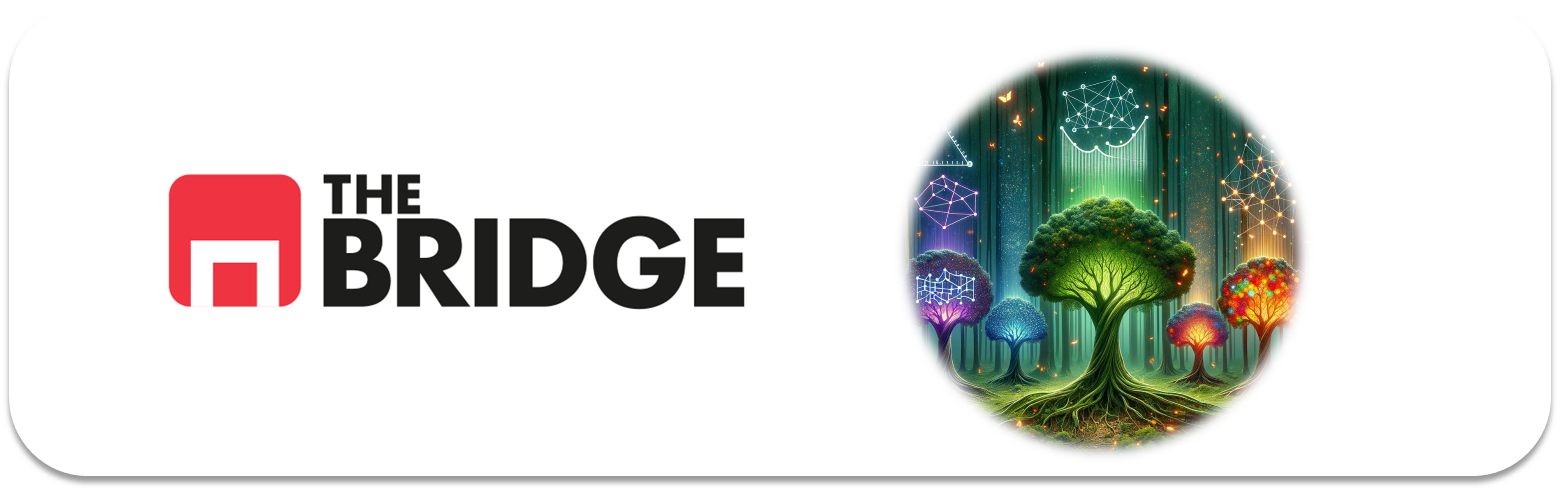

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, ConfusionMatrixDisplay, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from TOOLBOX_1 import *
from xgboost import XGBClassifier
import xgboost  

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [2]:
df_diabetes= pd.read_excel(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_13\UNIT_2\PRACTICA_OBLIGATORIA\data\dataset_u2_s13.xlsx")

In [3]:
df_diabetes

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


todos numericos y ningun nulo

In [5]:
df_diabetes["class"].value_counts() # ligeramente desbalanceada

class
0    500
1    268
Name: count, dtype: int64

In [6]:
funcion_describe(df_diabetes)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
preg,2.21,int64,17,0.0
plas,17.71,int64,136,0.0
pres,6.12,int64,47,0.0
skin,6.64,int64,51,0.0
test,24.22,int64,186,0.0
mass,32.29,float64,248,0.0
pedi,67.32,float64,517,0.0
age,6.77,int64,52,0.0
class,0.26,int64,2,0.0


In [7]:
get_features_num_regression(df_diabetes, "class", umbral_corr=0.5, pvalue=0.05)

"Las columnas numéricas con |valor superior| al valor 0.5 aportado en la variable 'umbral_corr' son:['class']"

In [8]:
df_diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [9]:
X= df_diabetes[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]

y=df_diabetes['class']

In [16]:

classes = X.columns.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("train_X shape después de la división:", X_train.shape)
print("train_y shape después de la división:", y_train.shape)

train_X shape después de la división: (614, 8)
train_y shape después de la división: (614,)


In [10]:
correla_abs= np.abs(df_diabetes.corr(numeric_only=True)['class'].sort_values(ascending = False))
correla_abs

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


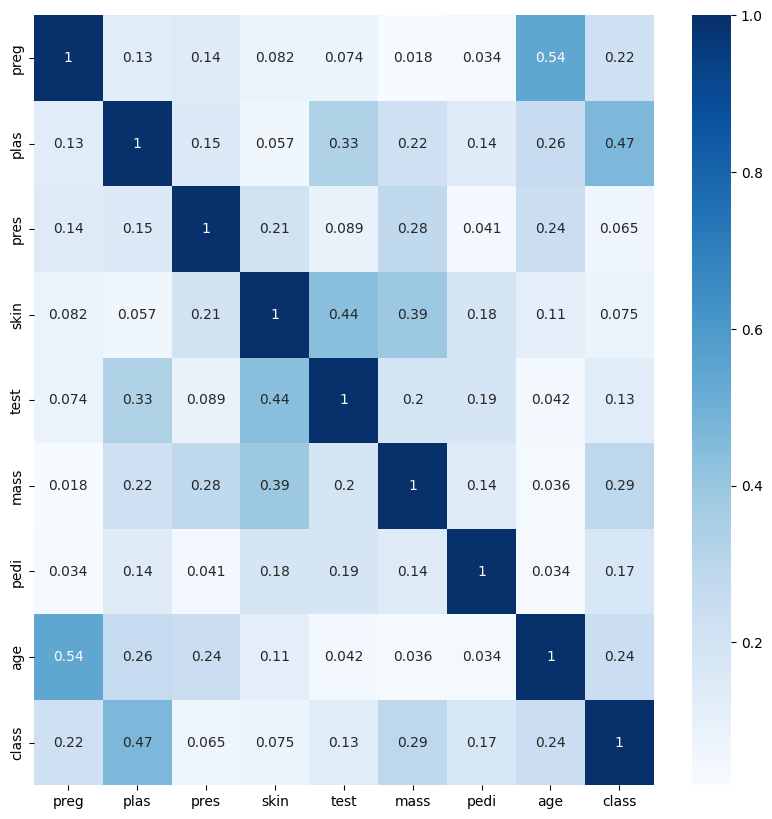

IndexError: list index out of range

<Figure size 1000x1000 with 0 Axes>

In [11]:
# Obtenemos la matriz de correlaciones
corr = np.abs(df_diabetes.corr(numeric_only=True))

# Dividimos la matriz de correlaciones en cuatro partes
corr_split = np.array_split(corr, 1, axis=1)

# Pintamos cada parte de la matriz de correlaciones
for i in range(4):
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_split[i], cmap="Blues", annot=True)
    plt.show();

In [15]:
df_diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

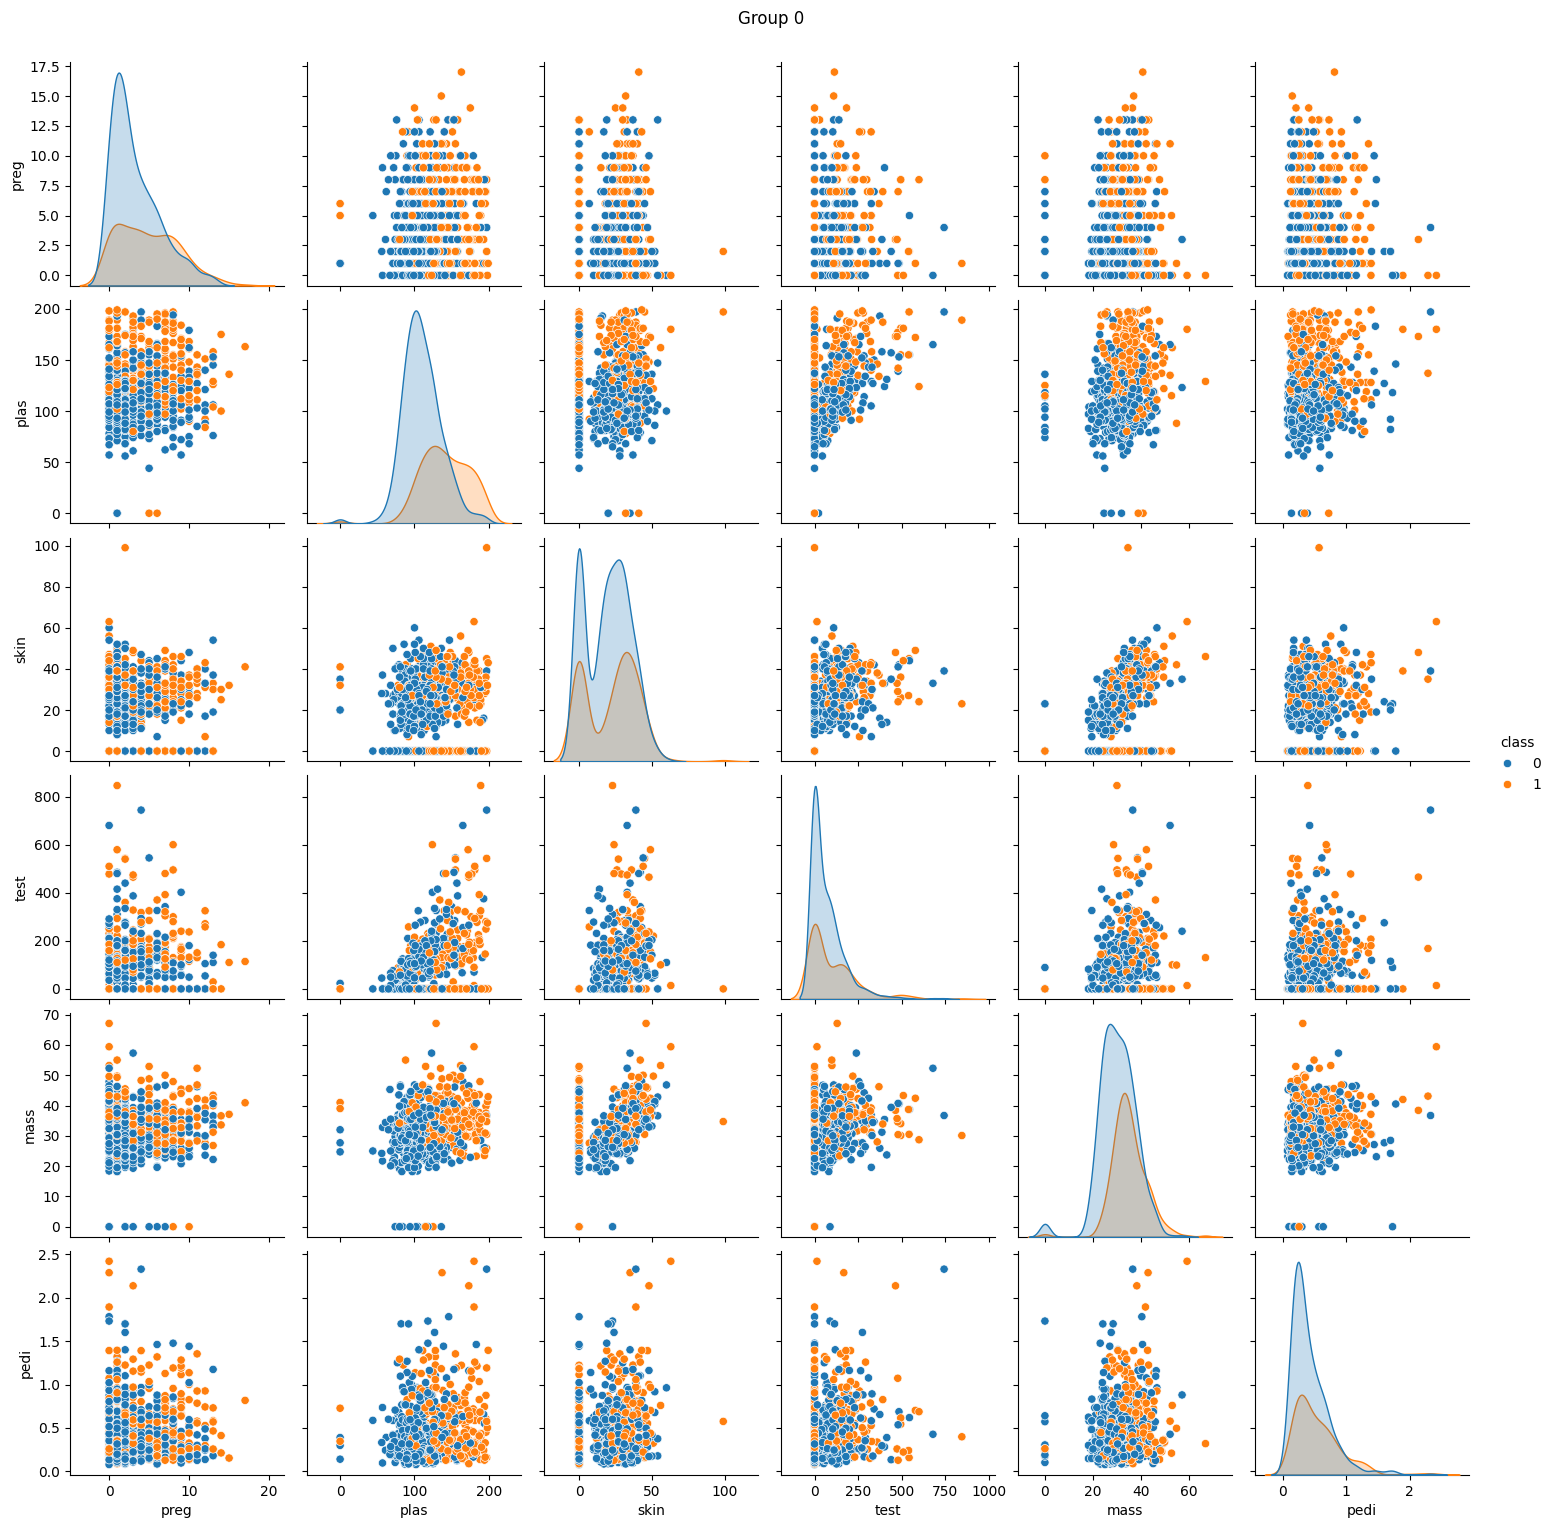

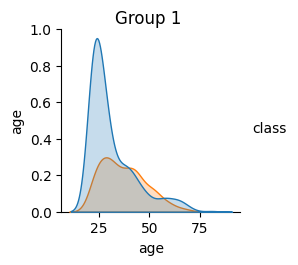

In [ ]:
plot_features_num_regression(df_diabetes, target_col="class", columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], umbral_corr=0, pvalue=0.05);

# bagging


1. RandomForestClassifier

In [17]:

rand_clf = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=42)

rand_clf.fit(X_train, y_train)

y_pred_rand_clf = rand_clf.predict(X_test)

classes = X.columns.values.tolist()



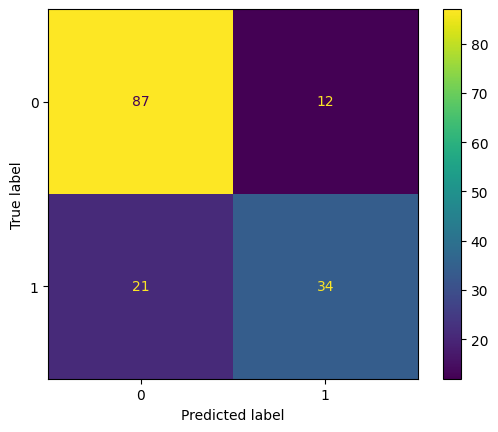

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rand_clf)

In [ ]:
print(classification_report(y_test, y_pred_rand_clf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [18]:
rand_clf.classes_

array([0, 1], dtype=int64)

In [19]:
rand_clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [20]:
rand_clf.feature_importances_

array([0.06140882, 0.36940595, 0.03910442, 0.03669145, 0.06259452,
       0.19068313, 0.07347907, 0.16663265])

In [21]:
pd.DataFrame({'features':X.columns,
              'importance':rand_clf.feature_importances_}).sort_values('importance',
                                                                  ascending=False)

,features,importance
1,plas,0.369406
5,mass,0.190683
7,age,0.166633
6,pedi,0.073479
4,test,0.062595
0,preg,0.061409
2,pres,0.039104
3,skin,0.036691


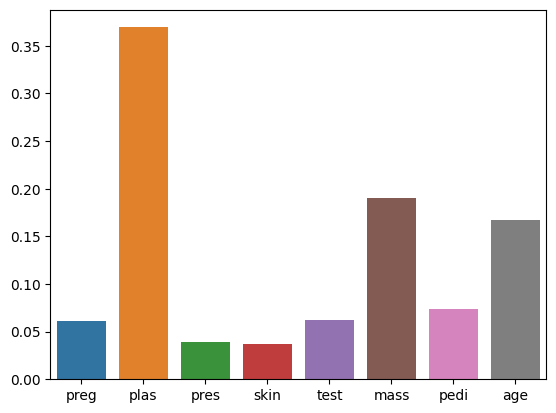

In [22]:
sns.barplot(x=classes, y=rand_clf.feature_importances_, hue = classes);

 PLAS=**Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.<BR>
 MASS= **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.<BR>
 AGE= **Edad**: Edad en años.

##### HIPERPARAMETROS MODELO ELEGIDO- RAMDOMFOREST, SEGUN LA VARIABLE OBTENIDA ESTIMATOR_PARAMS

In [51]:
param_grid_rand_clf = { # Lo vamos a probar para el clasificador, con el regresor es equivalente pero los valores no serán los mismos (no tenemos por ejemplo el mismo nuúmero de muestras)
    "n_estimators": [100,200,400], # Tecnica del halving (doblamos o dividimos a la mitad)
    "max_depth": [2,4,8,None],# profunidad maxima  de los arboles en el bosque: > depth mayore ajuste, pero tb pude llegar al sobreajuste
    "max_features": ["sqrt", "log2"], # Vamos a probar diferente número de features en cada split
    "class_weight": ["balanced", None],
    #'criterion': ['gini', 'entropy'],# criterio usada para dividir los arboles( impureza: gini, ganancia de informacion de la division:entropía)
    'min_samples_split': [2, 4, 8],# minimo de muestras para dividir un nodo. > numero, mas rendimiento pero puede llegar al sobreajueste
    'min_samples_leaf': [1, 2, 4],# minimo de muestras que deben tener los nodos hoja. > numero permite menos hojas, que mejora el rendimiento pero tb puede llegar sibreajuste
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.2],# minimo de peso que puede tener un nodo hoja. < numero permite mas hojas, que mejora el rendimiento pero tb puede llegar sibreajuste
    #'max_leaf_nodes': [None, 10, 20, 30], # maximo de nodos hoja.< numero permite un menor crecimiento, ayudando a no llegar al sobreajuste
    #'min_impurity_decrease': [0.0, 0.1, 0.2], # minimo de impureza que puede tener un nodo. > valor evitara que los arboles hagan divisiones innecesarias, previniendo el sobreajuste.
    'random_state': [42],# garantiza su reproducibilidad al usar las misas semillas aleatorias
    #'ccp_alpha': [0.0, 0.1, 0.2],# La poda de costo- complejidad se usa para la regularización de la complejidad de los arboles. < valor hara arboles mas simples, ayudando al sobreajuste.
    #'monotonic_cst':[None],  # SI EL BOSQUE ES CRECIENTE O DECRECIENTE o None, puede mejorar el rendimiento
    
}

In [52]:
#modelo
clf_rf = RandomForestClassifier()

# evaluara mediante una puntuacion y nos dira la metrica que aporta mas rendimiento a nuestro modelo(> valor)
scoring_grid = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
}

#valores del gid y la metrica con diferentes metidos
grid_models = GridSearchCV(clf_rf,
                           param_grid_rand_clf,
                           scoring= scoring_grid,
                           refit=False, # para obtener los mejores valores estimatorios gridserachcv tiene que estar en True pero como ahora no lo queremos,pq los tenemos(false) y evita conflictos
                           cv = 5,
                           n_jobs= -1)#maximo pararelismo pc
#prueba
grid_models.fit(X_train, y_train)

#resultados metrica cruzada
print(grid_models.cv_results_)

{'mean_fit_time': array([0.19607501, 0.4101027 , 0.75178871, 0.19806986, 0.38197846,
       0.81561809, 0.19966631, 0.4499959 , 0.7364295 , 0.20804358,
       0.41748295, 0.81083055, 0.20146108, 0.40132732, 0.80165505,
       0.19368181, 0.37679181, 0.78629613, 0.19447975, 0.37798848,
       0.79906216, 0.20564966, 0.42985015, 0.80983348, 0.18430715,
       0.40052824, 0.74799886, 0.24195271, 0.44879928, 0.83077745,
       0.19886761, 0.41808128, 0.76455421, 0.23776393, 0.43703055,
       0.82020559, 0.20046387, 0.39713798, 0.88204021, 0.24913397,
       0.46156492, 1.0611609 , 0.24115491, 0.53377218, 0.96302381,
       0.3297174 , 0.49607329, 1.02525673, 0.2377636 , 0.49627228,
       1.03941917, 0.2435483 , 0.46715012, 0.96761112, 0.28025012,
       0.50185728, 1.03483152, 0.25471883, 0.50883827, 0.99713235,
       0.26987772, 0.53097944, 0.97738519, 0.25651364, 0.51761527,
       0.96242528, 0.24973159, 0.50006204, 1.03423295, 0.25192609,
       0.50484943, 1.00371451, 0.28244419, 0

RANDONFORESTCLASSIFIER CON TODO Y 660 MINUTOS DE ESPERA

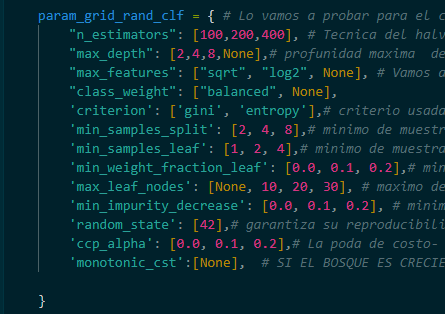

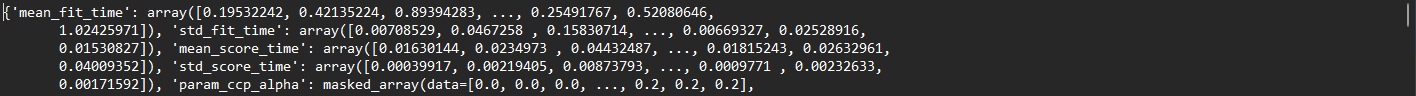

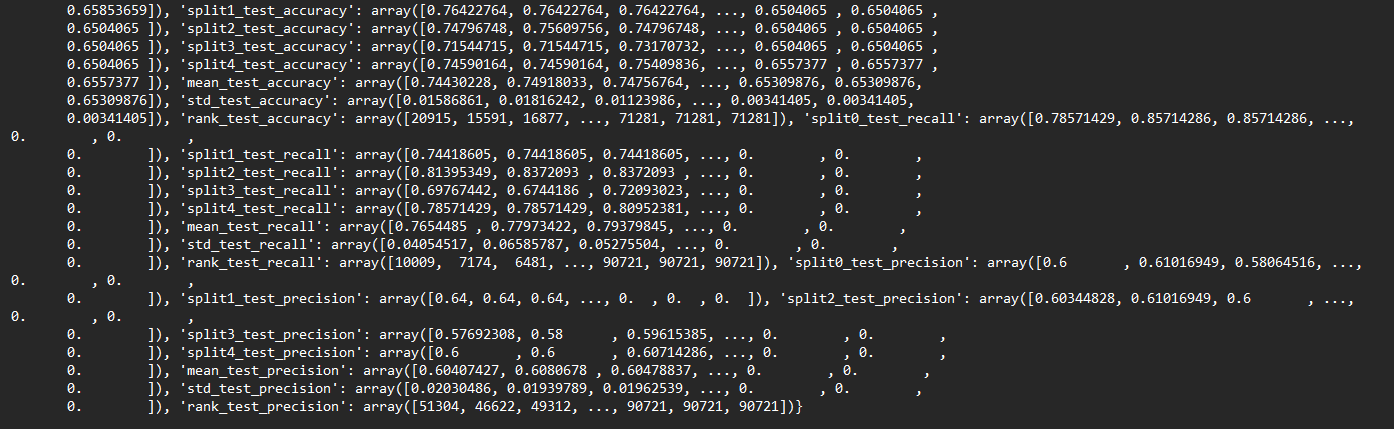

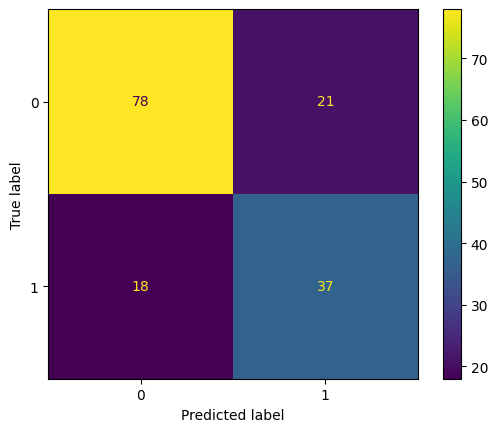

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))

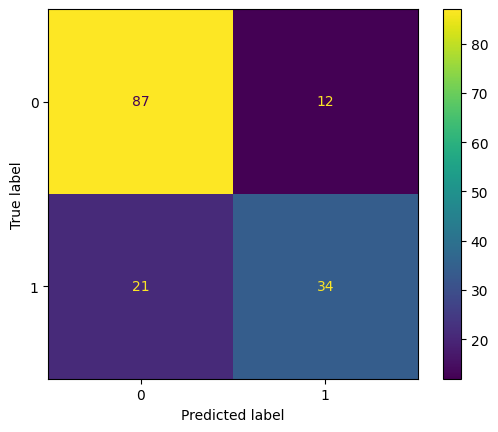

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rand_clf)

In [58]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
print(classification_report(y_test, y_pred_rand_clf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



# boosting

### XGBClassifie

In [ ]:
xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train, y_train)
y_pred = xgb_clas.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [ ]:
### XGBoost
metricas_optimizadas = {}


xgb_clf = XGBClassifier()

param_grid = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          }

xgb_grid = RandomizedSearchCV(xgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "accuracy")


xgb_grid.fit(X_train, y_train)
print("XGB best_score:", xgb_grid.best_score_)
metricas_optimizadas["XGBoost"] = xgb_grid.best_score_

XGB best_score: 0.7719910728519049


In [ ]:

best_model=xgb_grid.best_estimator_

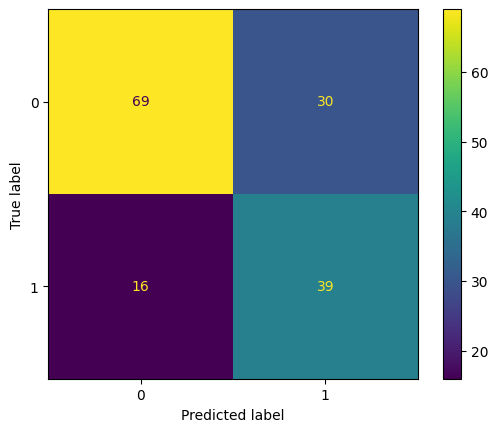

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))

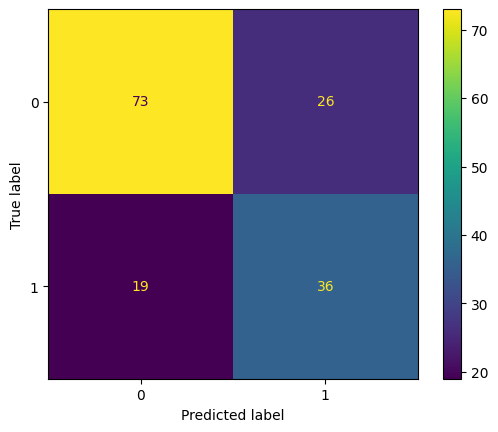

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



### GradientBoostingClassifier

In [25]:

gra_b_clf = GradientBoostingClassifier()

gra_b_clf.fit(X_train, y_train)
y_pred = gra_b_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



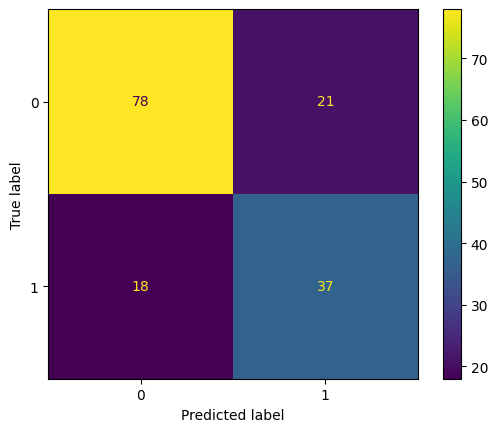

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [36]:

param_grid = {
    "n_estimators": [100,400],
    "learning_rate": [0.1,1,3.2]
}

model_grid = GridSearchCV(gra_b_clf,
                          param_grid= param_grid,
                          cv = 5,
                          scoring = "neg_mean_squared_error") # Se intenta maximizar el scoring por eso cuando la métrica es mejor cuando es más baja hay que usar las negadas

model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1, 3.2],
                         'n_estimators': [100, 400]},
             scoring='neg_mean_squared_error')

In [37]:
best_model=model_grid.best_estimator_

In [38]:
model_grid.best_score_

-0.22800213248034118

In [39]:
model_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

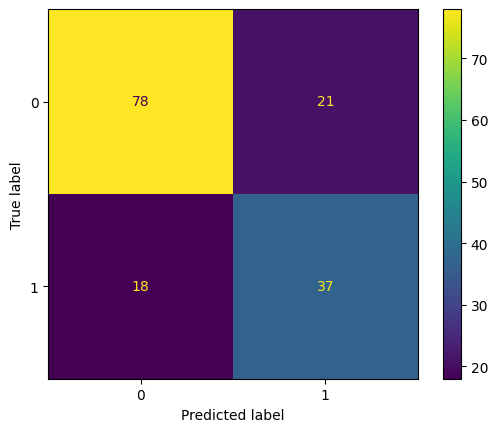

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))

In [41]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### BEST_ESTIMATOR

In [42]:

param_grid_2 = {
    "n_estimators": [100],
    "learning_rate": [0.1]
}

model_grid_2 = GridSearchCV(gra_b_clf,
                          param_grid= param_grid_2,
                          cv = 5,
                          scoring = "neg_mean_squared_error") # Se intenta maximizar el scoring por eso cuando la métrica es mejor cuando es más baja hay que usar las negadas

model_grid_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [43]:
model_grid_2.best_score_

-0.22800213248034118

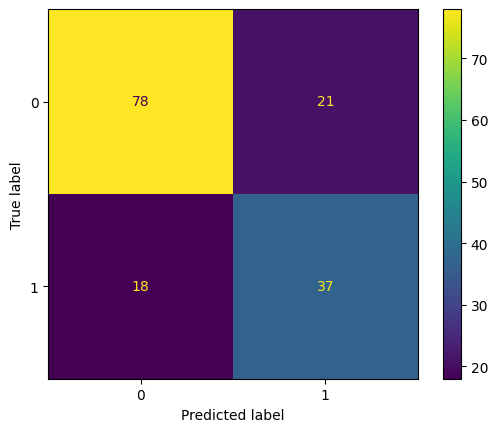

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# conclusiones

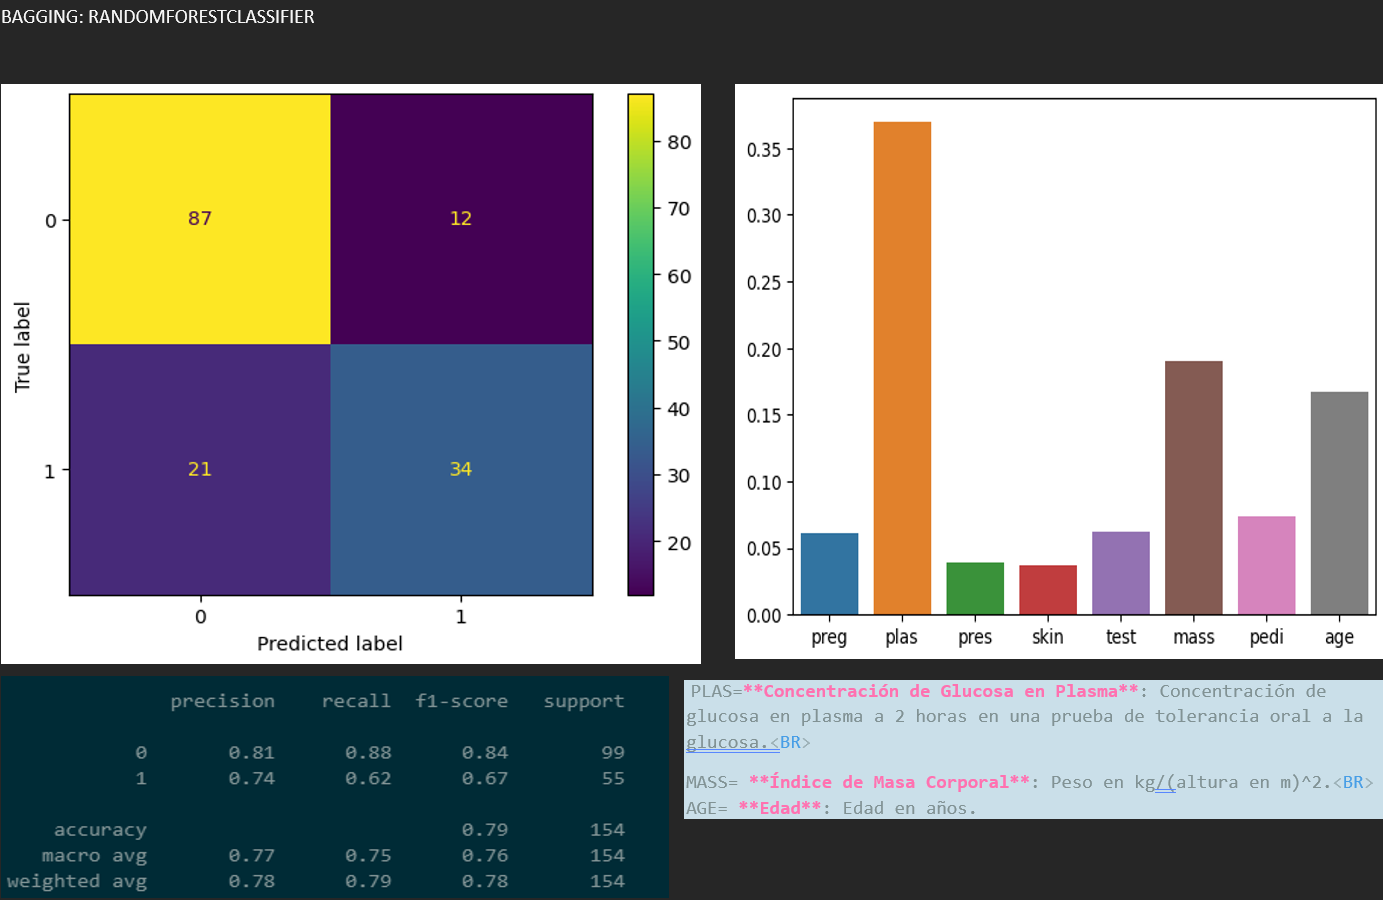

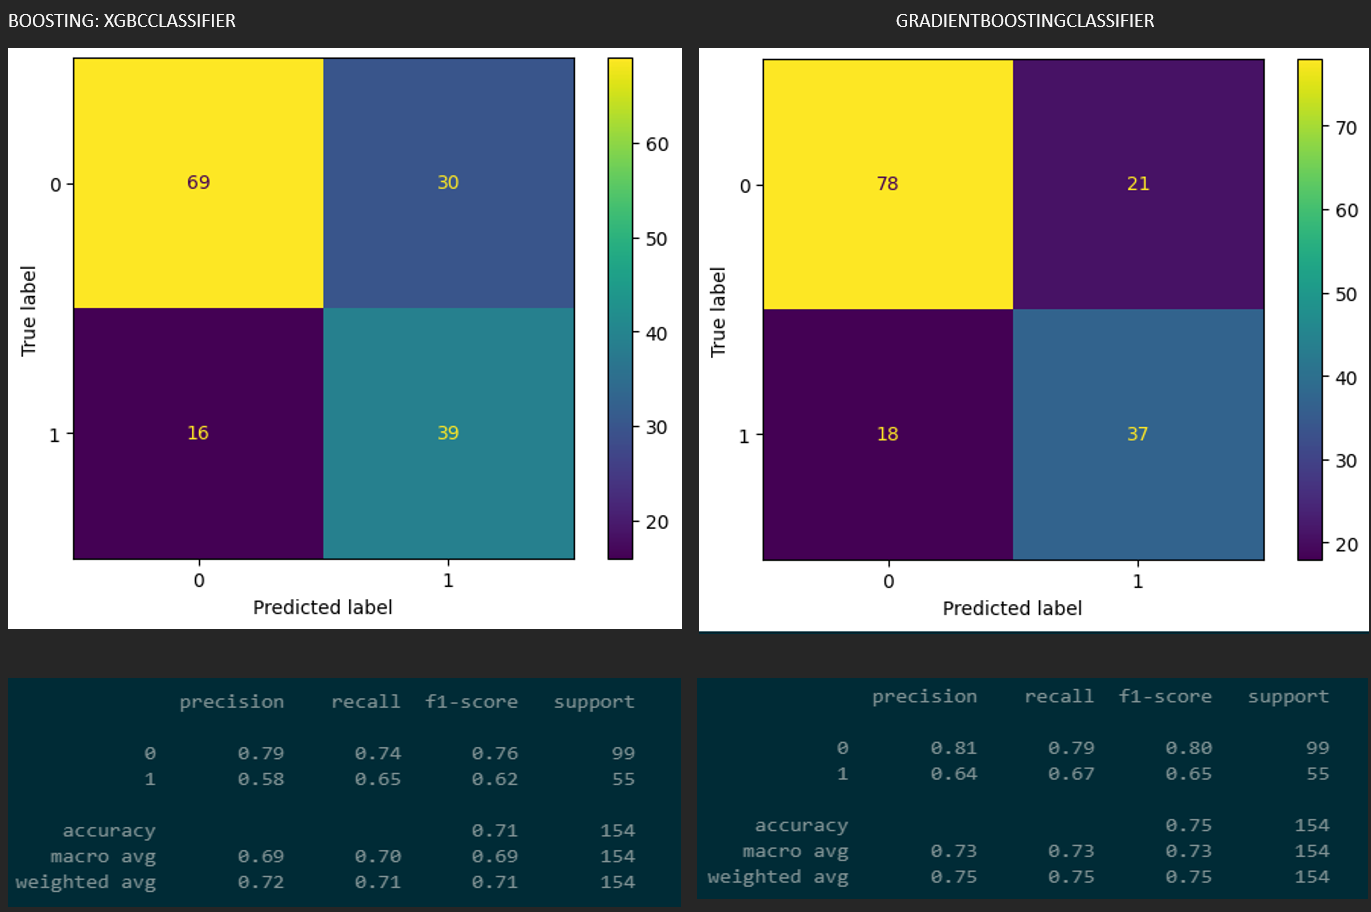

In [46]:
df_diabetes["class"].value_counts()/len(df_diabetes)*100

class
0    65.104167
1    34.895833
Name: count, dtype: float64

Al estar la target ligeramente balanceada, el mejor modelo a usar es el aprendizaje automatico emsamblado , a traves del modelo RandomForest, ademas que es el modelo que mejores datos aporta EN F1-SCORE, aunque, dada las caracteristicas del dataset, es mejor asegurar que si acierte en los 1 aunque se escape algun 0, por lo que en recall o sensibilidad, el mejor modelo a escoger es el GradientBostingClassifier